In [40]:
from sklearn.datasets import make_classification
import numpy as np

In [41]:
X,Y=make_classification(n_samples=2000,n_classes=2,n_features=10,random_state=0)

In [42]:
random_state=np.random.RandomState(0)
n_samples,n_features=X.shape
X=np.c_[X,random_state.randn(n_samples,200 * n_features)]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [46]:
from sklearn import svm

In [36]:
clf=svm.SVC(kernel='linear',probability=True)
clf.fit(X_train,Y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
rf=RandomForestClassifier(max_features=5,n_estimators=500)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
nb=GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
r_probs=[0 for _ in range(len(Y_test))]
rf_probs=rf.predict_proba(X_test)
nb_probs=nb.predict_proba(X_test)
clf_probs=clf.predict_proba(X_test)

In [47]:
rf_probs=rf_probs[:,-1]
nb_probs=nb_probs[:,-1]
clf_probs=clf_probs[:,-1]

In [48]:
from sklearn.metrics import roc_curve,roc_auc_score

In [50]:
r_auc=roc_auc_score(Y_test,r_probs)
rf_auc=roc_auc_score(Y_test,rf_probs)
nb_auc=roc_auc_score(Y_test,nb_probs)
clf_auc=roc_auc_score(Y_test,clf_probs)


In [51]:
print('Random (Chance) Prediction: AUROC= ',r_auc)
print('Random Forest: AUROC= ',rf_auc)
print('Naive Bayes: AUROC= ',nb_auc)
print('Support Vector Machines: AUROC= ',clf_auc)

Random (Chance) Prediction: AUROC=  0.5
Random Forest: AUROC=  0.914532802683287
Naive Bayes: AUROC=  0.9932417211083577
Support Vector Machines: AUROC=  0.9359715651673299


In [52]:
r_fpr,r_tpr,_= roc_curve(Y_test,r_probs)
rf_fpr,rf_tpr,_=roc_curve(Y_test,rf_probs)
nb_fpr,nb_tpr,_=roc_curve(Y_test,nb_probs)
clf_fpr,clf_tpr,_=roc_curve(Y_test,clf_probs)

In [53]:
import matplotlib.pyplot as plt


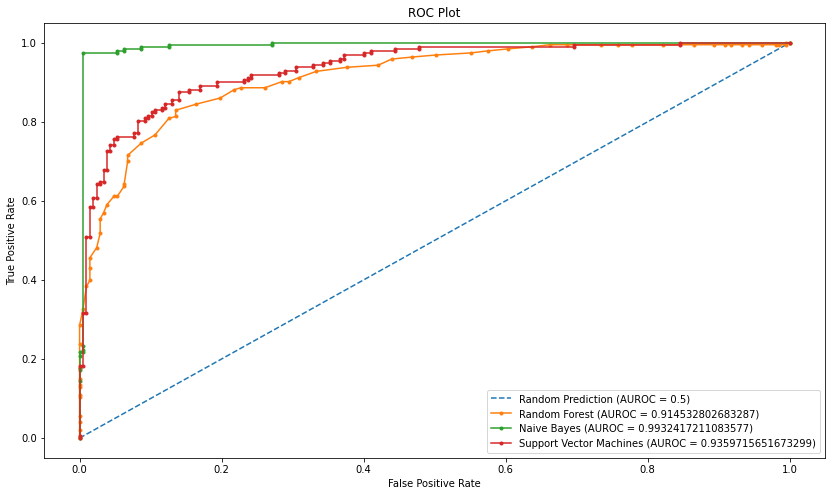

In [54]:
plt.figure(figsize=(14,8))
plt.plot(r_fpr,r_tpr,linestyle='--',label='Random Prediction (AUROC = {})'.format(r_auc))
plt.plot(rf_fpr,rf_tpr,marker='.',label='Random Forest (AUROC = {})'.format(rf_auc))
plt.plot(nb_fpr,nb_tpr,marker='.',label='Naive Bayes (AUROC = {})'.format(nb_auc))
plt.plot(clf_fpr,clf_tpr,marker='.',label='Support Vector Machines (AUROC = {})'.format(clf_auc))



plt.title('ROC Plot')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
